In [1]:
import os
import sys
import rootpath
sys.path.append(rootpath.detect())

from testsuite.analysis_tools import get_target_igd_refpoints
from testsuite.utilities import Pareto_split, dominates
from testsuite.analysis import load_all #, plot_all_pareto_2d, PLOT_STYLE, plot_measure
from json import load

import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import wfg

In [2]:
from experiments.directed.data.wfg1_2obj_3dim.problem_setup import func, k, l, M, n_dim, n_obj, y
print("{} {}obj {}dim".format(func, n_obj, n_dim), "k:{}".format(k), "l:{}".format(l), "M:{}".format(M))

WFG1
<built-in function WFG1> 2obj 3dim k:1 l:2 M:2


In [3]:
ref_points = np.load("../../../undirected/igd_refpoints/problem_refpoints/data/wfg1_2d_refpoints")
ref_points = ref_points[::20]

In [4]:
with open("./targets", "r") as infile:
    target_dict = load(infile)

In [5]:
targets = np.asarray(target_dict['{}_{}obj_{}dim'.format(func.__name__, n_obj, n_dim)])

(0.08972605845097456,
 2.3924272759076914,
 -0.008820453678154372,
 4.492378238363584)

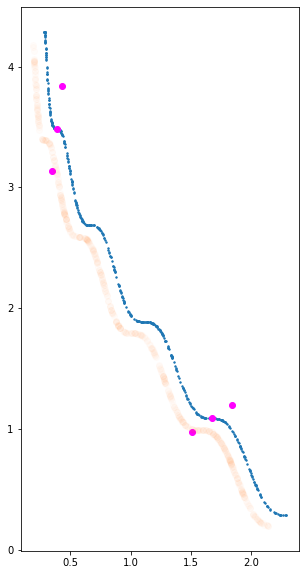

In [6]:
plt.figure(figsize=[10, 10])
plt.scatter(*y.T, s=2)
plt.scatter(*targets.T, c="magenta")
plt.scatter(*ref_points.T, c="C1", alpha=0.02)
plt.gca().axis("scaled")

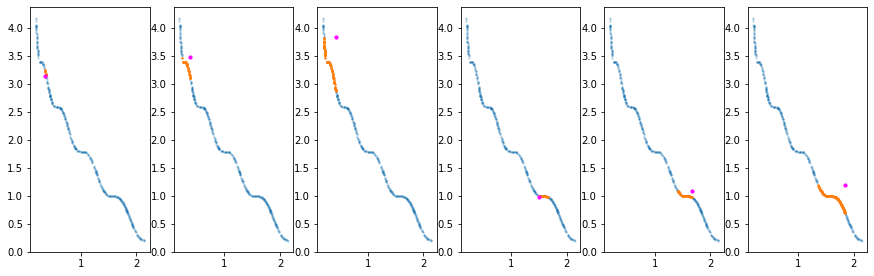

In [7]:
fig, axes = plt.subplots(1, 6,figsize=[15, 10])

target = targets[2]

for ax, target in zip(axes.flat, targets):
    igd_points, other_points = get_target_igd_refpoints(target, ref_points) 
    
    ax.scatter(*other_points.T, c="C0", s=2, alpha=0.2)
    ax.scatter(*igd_points.T, c="C1", s=2)
    ax.scatter(*target.T, c="magenta", s=10)
    ax.axis('scaled')

In [8]:
from experiments.directed.data.wfg1_3obj_4dim.problem_setup import func, k, l, M, n_dim, n_obj, y
print("{} {}obj {}dim".format(func, n_obj, n_dim), "k:{}".format(k), "l:{}".format(l), "M:{}".format(M))

WFG1
<built-in function WFG1> 3obj 4dim k:2 l:2 M:3


In [9]:
ref_points = np.load("../../../undirected/igd_refpoints/problem_refpoints/data/wfg1_3d_refpoints")

In [10]:
targets = np.asarray(target_dict['WFG1_3obj_4dim'])

In [11]:
targets

array([[0.332, 1.352, 1.308],
       [0.369, 1.502, 1.453],
       [0.406, 1.652, 1.599],
       [0.805, 0.31 , 1.894],
       [0.895, 0.345, 2.104],
       [0.984, 0.379, 2.314]])

In [12]:
%matplotlib qt
fig = plt.figure(figsize=[10, 10])
ax = fig.gca(projection="3d")
ax.scatter(*y.T, s=2)
ax.scatter(*targets.T, c="magenta")
ax.scatter(*ref_points.T, c="C1", alpha=0.02)

In [30]:
fig, axes = plt.subplots(2, 3,figsize=[15, 10], subplot_kw={'projection': "3d"})

for ax, target in zip(axes.flat, targets):
    igd_points, other_points = get_target_igd_refpoints(target, y) 
    
    ax.scatter(*other_points.T, c="C0", s=2, alpha=0.2)
    ax.scatter(*igd_points.T, c="C1", s=2)
    ax.scatter(*target.T, c="magenta", s=10)

In [32]:
fig, axes = plt.subplots(2, 3,figsize=[15, 10], subplot_kw={'projection': "3d"})

target = targets[2]

for ax, target in zip(axes.flat, targets):
    igd_points, other_points = get_target_igd_refpoints(target, ref_points) 
    
    ax.scatter(*other_points.T, c="C0", s=2, alpha=0.2)
    ax.scatter(*igd_points.T, c="C1", s=2)
    ax.scatter(*target.T, c="magenta", s=10)

In [33]:
from experiments.directed.data.wfg1_4obj_5dim.problem_setup import func, k, l, M, n_dim, n_obj, y
print("{} {}obj {}dim".format(func, n_obj, n_dim), "k:{}".format(k), "l:{}".format(l), "M:{}".format(M))

WFG1
<built-in function WFG1> 4obj 5dim k:3 l:2 M:4


In [53]:
t1 = y[np.argsort(y[:, 0])][200]
t2 = y[np.argsort(y[:, 0])][450]

In [58]:
for t in [t1, t2]:
    for i in [0.9, 1., 1.1]:
        print(t*i)

[0.00506805 0.01450383 2.0741083  2.67170142]
[0.00563116 0.01611537 2.30456478 2.96855713]
[0.00619428 0.01772691 2.53502125 3.26541285]
[0.2840733  0.33494929 0.59489375 0.77715356]
[0.315637   0.37216588 0.66099306 0.86350396]
[0.3472007  0.40938246 0.72709236 0.94985435]


In [60]:
targets = np.asarray(target_dict['WFG1_4obj_5dim'])
targets

array([[0.00506805, 0.01450383, 2.0741083 , 2.67170142],
       [0.00563116, 0.01611537, 2.30456478, 2.96855713],
       [0.00619428, 0.01772691, 2.53502125, 3.26541285],
       [0.2840733 , 0.33494929, 0.59489375, 0.77715356],
       [0.315637  , 0.37216588, 0.66099306, 0.86350396],
       [0.3472007 , 0.40938246, 0.72709236, 0.94985435]])